In [1]:
# import all the required libraries 
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans


In [2]:
#Let's read the dataset first
dat = pd.read_csv('C:\ML_assignment\Country-data.csv')
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
## Let's drop country column as this is a label column and we don't need it in case of unsupervised learning models
dat.drop('country', axis = 1, inplace = True)

In [5]:
#dat.head()

In [6]:
dat['ID'] = dat.index+100
dat.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,103
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104


In [7]:
dat.shape

(167, 10)

In [8]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
ID            167 non-null int64
dtypes: float64(7), int64(3)
memory usage: 13.1 KB


# checking for null values

In [9]:
dat.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
ID            0
dtype: int64

### Let's perfrom Outlier treatment

## Question-2:

Which column have some outliers?

In [10]:
dat.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'ID'],
      dtype='object')

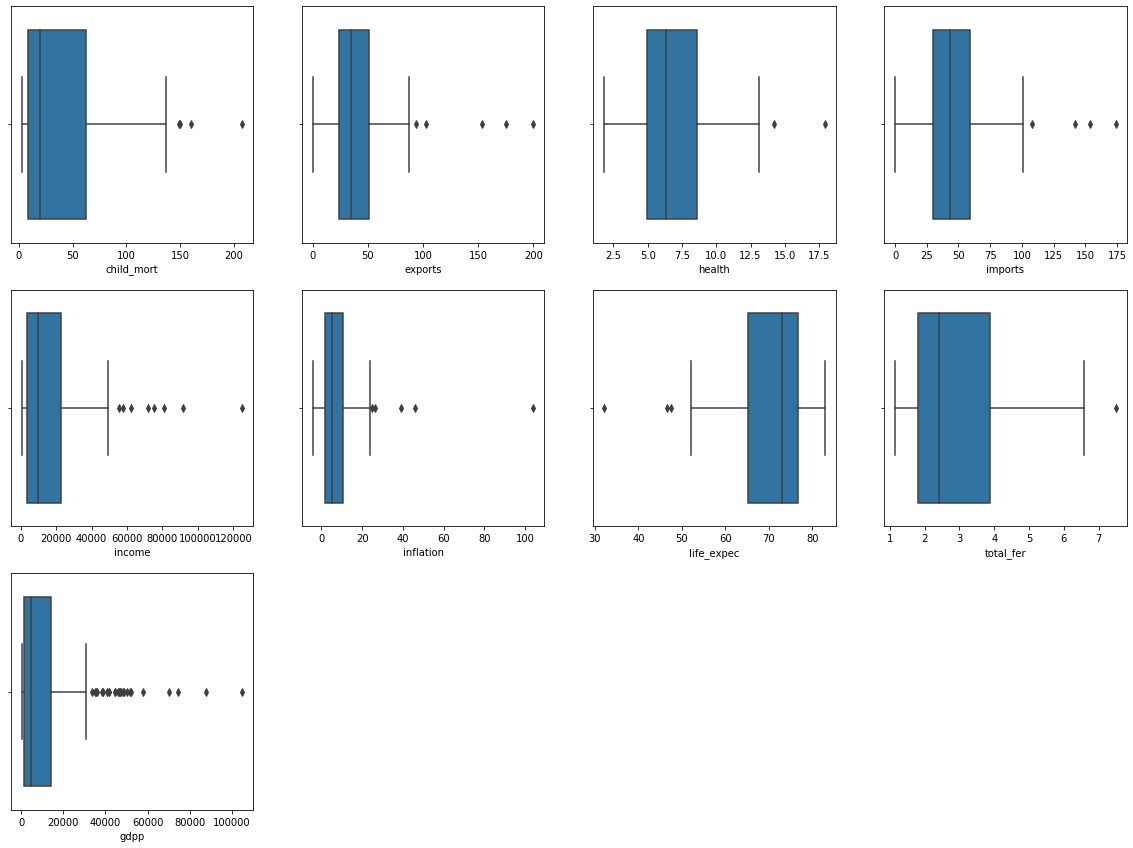

In [11]:
plt.figure(figsize = (20,20))
var = ['child_mort', 'exports', 'health', 'imports','income', 'inflation','life_expec', 'total_fer','gdpp',]
for i in enumerate(var):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x = i[1], data = dat)

Avoiding removing outliers since there are too much outliers present and chances of loosing data is high

### Let's begin with analysis part 

### 1. Principal Component Analysis

In [12]:
# Let's preserve the ID column to some variable, so that we can make use of it later after perfroming PCA
ID = dat['ID']

In [13]:
# Now let's drop the ID column as it is not a predictor in our data.
dat1 = dat.drop('ID', axis =1)

In [14]:
# Let's check the info about the data
dat1.shape

(167, 9)

## Question-3: 

In the below cell use standard scaler to standardise the data

After this, check what is the maximum value in the array we have?

In [15]:
## Let's scale the data with 4 columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dat2 =scaler.fit_transform(dat1)

In [16]:
# Check maximum value here
dat2.max()

9.129718055281284

## Question-4, 5 & 6: 

Now, we will perfrom PCA on the data we have, use svd_solver as randomized and random_state as 42

After this, check pca.components_, this will basically give you the all the vectors of the new feature space. Now check the first vector and check the first coponent of it.

- Which variable explains the maximum variance in the original data?
- What is the first coponent of the first vector obtained from pca.components_?
- What is the variance explained by the first principa component?

In [17]:
dat.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,103
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104


In [18]:
# Check the current variance of each column
100*dat1.var()/sum(dat1.var())

child_mort    2.298543e-04
exports       1.061943e-04
health        1.066314e-06
imports       8.283122e-05
income        5.252260e+01
inflation     1.579163e-05
life_expec    1.117719e-05
total_fer     3.238796e-07
gdpp          4.747695e+01
dtype: float64

In [19]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state = 42)
pca.fit(dat2)
# Eigen Value Decomposition

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [20]:
#first coponent of the first vector obtained from pca.components_
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [21]:
#What is the variance explained by the first principal component
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Text(0, 0.5, 'Cumulative Variance')

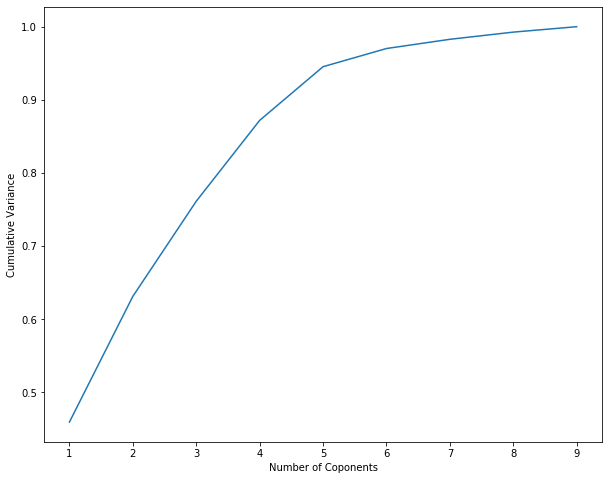

In [22]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot([1,2,3,4,5,6,7,8,9], np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Coponents')
plt.ylabel('Cumulative Variance')

## Question-7:

Choose the correct number of PCA from the cumulative variance plot.

What is the number of PCs we can go about?

In [23]:
# What is the number of PCs we can go about?

# Answer here: 4

### Run the PCA with the components choosed above

In [24]:
#Finally let's go ahead and do dimenstionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 4)

In [25]:
# Transform the data here
df_pca = pca_final.fit_transform(dat2)
df_pca.shape

(167, 4)

In [26]:
# Create a dataframe with the PCs obtained
pc  = pd.DataFrame(df_pca)
pca_df2 = pd.DataFrame({'ID': list(ID), 'PC1': pc[0], 'PC2':pc[1], 'PC3':pc[2], 'PC4':pc[3],})


In [27]:
pca_df2.head()

,ID,PC1,PC2,PC3,PC4
0,100,-2.913787,0.088354,0.721003,0.996699
1,101,0.429358,-0.587859,0.321052,-1.171193
2,102,-0.282988,-0.446657,-1.225135,-0.850127
3,103,-2.930969,1.699437,-1.521734,0.875966
4,104,1.031988,0.130488,0.192922,-0.844808


## Clustering 

In [28]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

## Question 8:

Is the given data good for performing Clustering?

In [29]:
#Let's check the Hopkins measure
hopkins(pca_df2.drop(['ID'], axis=1))

0.8015550435994357

In [30]:
dat3_1 = pca_df2

In [31]:
dat3_1.head()

,ID,PC1,PC2,PC3,PC4
0,100,-2.913787,0.088354,0.721003,0.996699
1,101,0.429358,-0.587859,0.321052,-1.171193
2,102,-0.282988,-0.446657,-1.225135,-0.850127
3,103,-2.930969,1.699437,-1.521734,0.875966
4,104,1.031988,0.130488,0.192922,-0.844808


### K- means Clustering

## Question-7: Look at the silhouette score plot and choose the optimal number of cluster

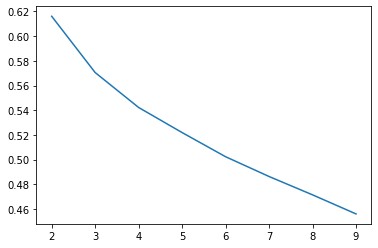

In [32]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(dat3_1)
    ss.append([k, silhouette_score(dat3_1, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

## Question-8: Look at the Elbow Curve plot and choose the optimal number of cluster

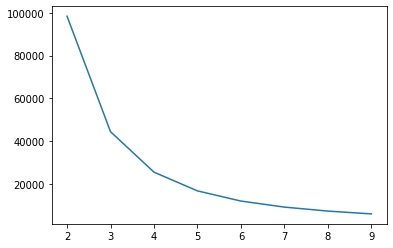

In [33]:
#Now let's proceed to the elbow curve method

ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(dat3_1)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

## KMeans with the K the we have choosed

In [34]:
#Let's perform K means using K=4
model_kmean = KMeans(n_clusters = 4, random_state = 50)
model_kmean.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [35]:
pca_df2.columns

Index(['ID', 'PC1', 'PC2', 'PC3', 'PC4'], dtype='object')

In [36]:
# Let's add the cluster Ids to the PCs data 
dat_km = pd.concat([pca_df2.reset_index().drop('index', axis = 1), pd.Series(model_kmean.labels_).reset_index().drop('index', axis  =1)], axis = 1)
dat_km.columns = ['ID','PC1', 'PC2', 'PC3','PC4','ClusterID']
dat_km.head()

,ID,PC1,PC2,PC3,PC4,ClusterID
0,100,-2.913787,0.088354,0.721003,0.996699,2
1,101,0.429358,-0.587859,0.321052,-1.171193,2
2,102,-0.282988,-0.446657,-1.225135,-0.850127,2
3,103,-2.930969,1.699437,-1.521734,0.875966,2
4,104,1.031988,0.130488,0.192922,-0.844808,2


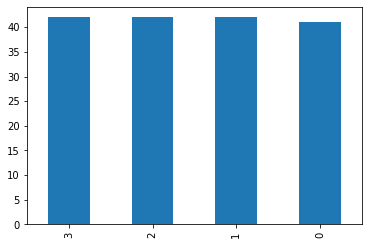

In [37]:
# Check the count of observation per cluster
dat_km['ClusterID'].value_counts().plot(kind = 'bar')

In [38]:
# Plot the Cluster with respect to the clusters obtained
dat_km.head()

,ID,PC1,PC2,PC3,PC4,ClusterID
0,100,-2.913787,0.088354,0.721003,0.996699,2
1,101,0.429358,-0.587859,0.321052,-1.171193,2
2,102,-0.282988,-0.446657,-1.225135,-0.850127,2
3,103,-2.930969,1.699437,-1.521734,0.875966,2
4,104,1.031988,0.130488,0.192922,-0.844808,2


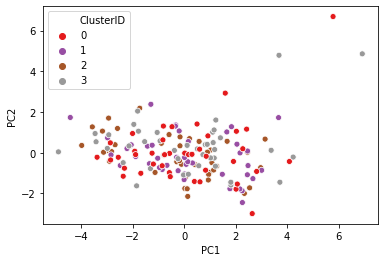

In [39]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x ='PC1', y = 'PC2', hue = 'ClusterID', data = dat_km, palette='Set1')

## Cluster Profiling

In [40]:
# Let's merge the original data with the data(ClusterID)
dat5 = pd.merge(dat, dat_km[['ID', 'ClusterID']], on = 'ID')

In [41]:
dat5.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,ClusterID
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,103,2
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104,2


#### So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

In [42]:
dat5.drop('ID', axis =1).groupby('ClusterID').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,
0,33.356098,42.395122,7.198293,47.692683,16962.439024,8.360488,70.912195,2.993415,12866.951220
1,35.278571,38.728333,6.906190,44.669048,18585.000000,6.685262,71.083333,2.838095,15087.333333
2,45.019048,37.219524,6.569524,41.404762,14499.547619,7.071952,69.847619,3.076429,10425.404762
3,39.309524,46.123548,6.597857,53.813474,18527.428571,9.023405,70.388095,2.885000,13474.619048


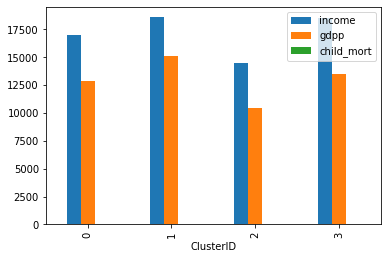

In [43]:
dat5[['income', 'gdpp', 'child_mort','ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar')

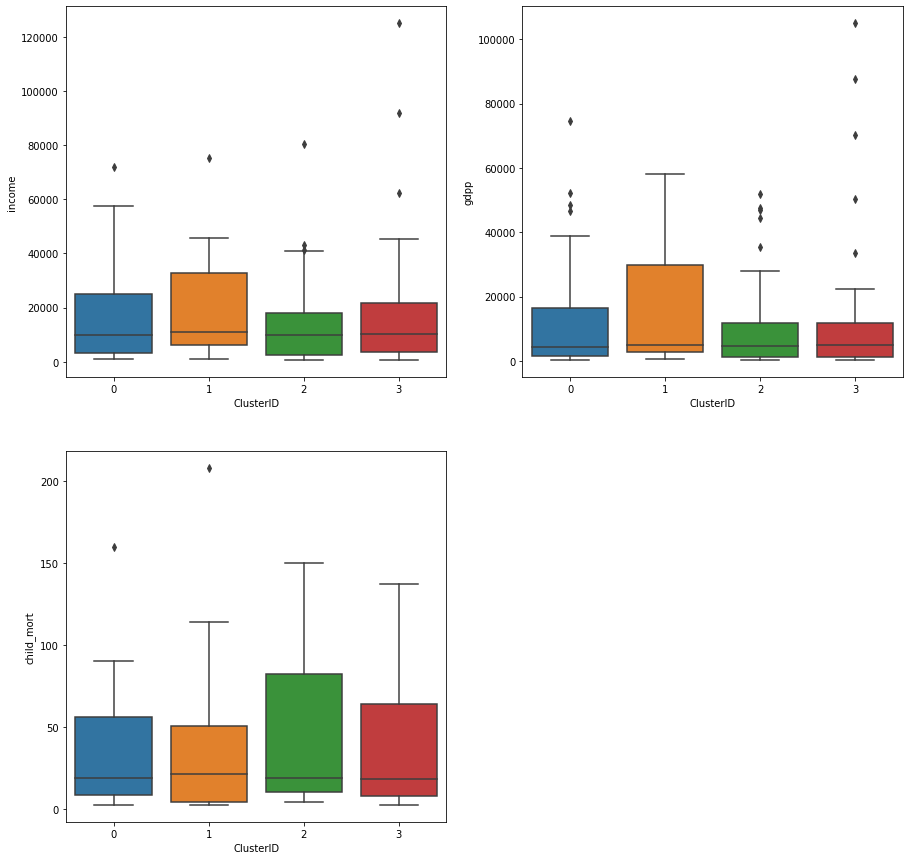

In [44]:
# Check outliers
plt.figure(figsize = (15,15))
var = ['income', 'gdpp', 'child_mort']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'ClusterID', y = i[1], data = dat5)

# Hierarchical Clustering 

In [72]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

##### Profiling using PCA 

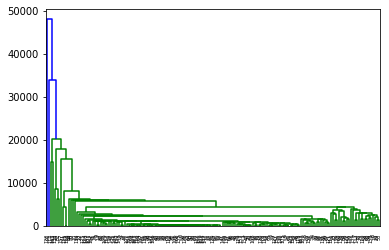

In [65]:
## Hirearchieal Clustering + Profiling
mergings = linkage(dat1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

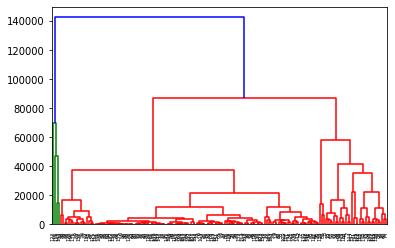

In [66]:
mergings = linkage(dat1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [67]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [68]:
# assign cluster labels
dat5['cluster_labels'] = cluster_labels
dat5.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,ClusterID,cluster_labels
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100,2,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101,2,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102,2,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,103,2,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104,2,0


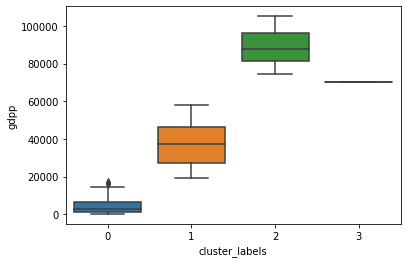

In [69]:
sns.boxplot(x='cluster_labels', y='gdpp', data=dat5)

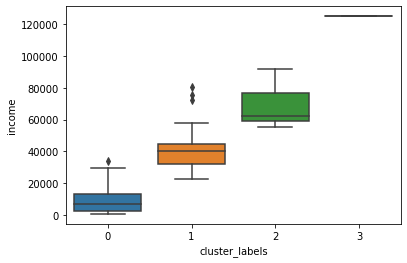

In [70]:
sns.boxplot(x='cluster_labels', y='income', data=dat5)

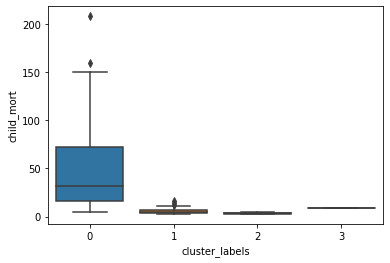

In [71]:
sns.boxplot(x='cluster_labels', y='child_mort', data=dat5)

In [64]:
#Let's use the concept of binning
# Find the counteries

dat5[dat5['ClusterID'] ==1] ['ID']

42    142
43    143
44    144
45    145
46    146
47    147
48    148
49    149
50    150
51    151
52    152
53    153
54    154
55    155
56    156
57    157
58    158
59    159
60    160
61    161
62    162
63    163
64    164
65    165
66    166
67    167
68    168
69    169
70    170
71    171
72    172
73    173
74    174
75    175
76    176
77    177
78    178
79    179
80    180
81    181
82    182
83    183
Name: ID, dtype: int64